<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout6_SimpleLinearRegression_PartB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #6 - Part B : Understanding a Standard Error

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Example 6.1

Consider data on the home prices of homes in La Crosse and Winona.  This data was collected using Redfin website. 
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li><strong>Response Variable</strong>: PRICE ($) </li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>SQUAREFEET, the size of the home (ft^2)</li>
          <li>BEDS, number of bedrooms in home</li>
          <li>BATHS, number of bathrooms in home</li>
          <li>LOTSIZE, the size of the lot (ft^2)</li>
          <li>YEARBUILT, the year in which the home was built</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1KiZ5CvmWwvDg4HSPX7FwRsQTUMtvv0gG" width='50%' height='50%'></img></p>
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)

Redfin Data: <a href="https://www.redfin.com/city/10404/WI/La-Crosse">La Crosse WI</a> | <a href="https://www.redfin.com/city/18151/MN/Winona">Winona MN</a></li>

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [2]:
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



The **read_csv()** function is used to read in the dataset. 

In [3]:
# Reading data in using read.csv via Base 
LaCrosseWinonaHomePrices <- read_csv("http://www.StatsClass.org/stat360/Datasets/LaCrosse_Winona_Redfin.csv")

Rows: 67 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): SALETYPE, PROPERTYTYPE, ADDRESS, CITY, STATE, LOCATION, STATUS, NE...
dbl (13): ZIPCODE, PRICE, BEDS, BATHS, SQUAREFEET, LOTSIZE, YEARBUILT, DAYSO...
lgl  (1): SOLDDATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# quick look at the data
head(LaCrosseWinonaHomePrices)

SALETYPE,SOLDDATE,PROPERTYTYPE,ADDRESS,CITY,STATE,ZIPCODE,PRICE,BEDS,BATHS,⋯,STATUS,NEXTOPENHOUSESTARTTIME,NEXTOPENHOUSEENDTIME,URL,SOURCE,MLSNumber,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
MLS Listing,NA,Single Family Residential,2504 Prospect St,La Crosse,WI,54603,224900,3,2.0,⋯,Active,NA,NA,https://www.redfin.com/WI/La-Crosse/2504-Prospect-St-54603/home/57710601,METROMLS,1811675,N,Y,43.85815,-91.23536
MLS Listing,NA,Single Family Residential,2205 Johnson St,La Crosse,WI,54601,219900,2,2.0,⋯,Active,NA,NA,https://www.redfin.com/WI/La-Crosse/2205-Johnson-St-54601/home/57970153,METROMLS,1811671,N,Y,43.80073,-91.22238
MLS Listing,NA,Single Family Residential,40633 Lamoille Dr,Winona,MN,55987,294900,3,2.0,⋯,Pre On-Market,NA,NA,https://www.redfin.com/MN/Winona/40633-Lamoille-Dr-55987/home/55910942,NORTHSTARMLS,6260624,N,Y,44.00056,-91.46975
MLS Listing,NA,Single Family Residential,730 Harvey St,La Crosse,WI,54603,339000,3,2.5,⋯,Active,NA,NA,https://www.redfin.com/WI/La-Crosse/730-Harvey-St-54603/home/58008728,METROMLS,1811603,N,Y,43.83566,-91.23375
MLS Listing,NA,Single Family Residential,515 Losey Blvd N,La Crosse,WI,54601,379900,3,3.5,⋯,Active,September-25-2022 01:00 PM,September-25-2022 02:30 PM,https://www.redfin.com/WI/La-Crosse/515-Losey-Blvd-N-54601/home/89277469,METROMLS,1811572,N,Y,43.81707,-91.21970
MLS Listing,NA,Single Family Residential,3355 Peace St,La Crosse,WI,54601,274900,3,2.0,⋯,Active,NA,NA,https://www.redfin.com/WI/La-Crosse/3355-Peace-St-54601/home/89290885,METROMLS,1811563,N,Y,43.76875,-91.20766


##  Importance of Understanding Variation

An important component of many statistical investigations is **inferential methods**.  Inferential methods permit us to draw conclusions about a population based on a sample.   Consider the following depections where interest lies in Home Prices. 

<table border="0" align="center">
<tr>
  <td width="50%" align="center" valign="bottom" bgcolor="white"><font size="+2">Population Side</font><br>True Home Price - All Homes<br><img src="https://drive.google.com/uc?export=view&id=1A08uXuaBX1rz3L3fNJ4VIOMEKF2idk_4"></img>
  </td>
  <td width="50%" align="center" valign="bottom" bgcolor="white"><font size="+2">Sample Side</font><br>An Estimate of the Home Price<br><img src="https://drive.google.com/uc?export=view&id=1L3_bHMKy3cuiRjNvuqpAuojhLhAKs0-C"></img>
  </td>
</table>

The goal is to use information from the Sample side to draw inferences about the Population side.  An inherent problem in doing this is that the information on the sample side varies from sample-to-sample.  Thus, an understanding of the inherent variation from sample-to-sample is essential to inferential methods. 

<table border="0" align="center">
<tr>
  <td align="center" valign="center" bgcolor="white"><font size="+2">Outcomes Vary Over Repeated Samples</font><br><img src="https://drive.google.com/uc?export=view&id=1Qs2nM_QTh_wezJX6_X8hrh0WqPl8-XNg" width="50%" height="50%"></img>
  </td>
</table>

The inherent variation from sample-to-sample can be measured in two ways.
1.   Inherent variation can be determined via statistical theory
2.   Inherent variation can be determined via simulation (bootstrap)  

#### Inherent Variation in a Mean via Statistical Theory

The Central Limit Theorem states the following:

>   If a random variable, say $Y$, follows a normal distribution with $Mean = \mu$ and $Variance = \sigma^2$, which is often expressed as $Y \sim N(\mu, \sigma^2)$

>  then the distribution of the average $Y$, say $\bar{Y}$, is known to:
1.  Follow a normal distribution
2.  Have the same mean, so $E(\bar{Y}) = \mu$, and 
3.  Have a reduced variance equal to $Var(\bar{Y}) = \frac{\sigma^2}{n}$

<u>Comments</u>:

*    In shorthand notation, if $Y \sim N(\mu, \sigma^2)$, then $\bar{Y} \sim N(\mu, \frac{\sigma^2}{n})$
*    Normality of $Y$ is a necessary condition for the distribution of $\bar{Y}$ to follow a normal distribution; however, when the normality condition of $Y$ is relaxed, the distribution of $\bar{Y}$ is at least *approximately* normal
*    The **standard error** is the standard deviation in the distribution of $\bar{Y}$; thus, the standard error for an average is 

$$\begin{array}{rcl}
\mbox{Standard Error of } \bar{Y} & = & \sqrt{Var(\bar{Y})} \\
& = & \sqrt{\frac{\sigma^2}{n}} \\ 
& = & \frac{\sigma}{\sqrt{n}}
\end{array}
$$


In [8]:
(LaCrosseWinonaHomePrices
  %>% summarize(
                 Mean = mean(PRICE),
                 Var = var(PRICE),
                 StdDev = sd(PRICE),
                 Count = n(),
                 StdError = sd(PRICE)/sqrt(n())
  )
)

Mean,Var,StdDev,Count,StdError
<dbl>,<dbl>,<dbl>,<int>,<dbl>
280885.1,12346560380,111115.1,67,13574.87


<table border="0" align="center">
<tr>
  <td align="center" valign="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=1giLIQDYoEOpyjFg5FdPOhRmEDZ7XpuYr"></img>
  </td>
</table>

<table border="0" align="center">
<tr>
  <td align="center" valign="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=1MzAkLX9U6Ww0dgcZWsVRyrFeRWPPG4CE"></img>
  </td>
</table>

<table border="0" align="center">
<tr>
  <td align="center" valign="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=14DfVwckWsNoCv4phm-NPR2AQAtTWzLwW"></img>
  </td>
</table>

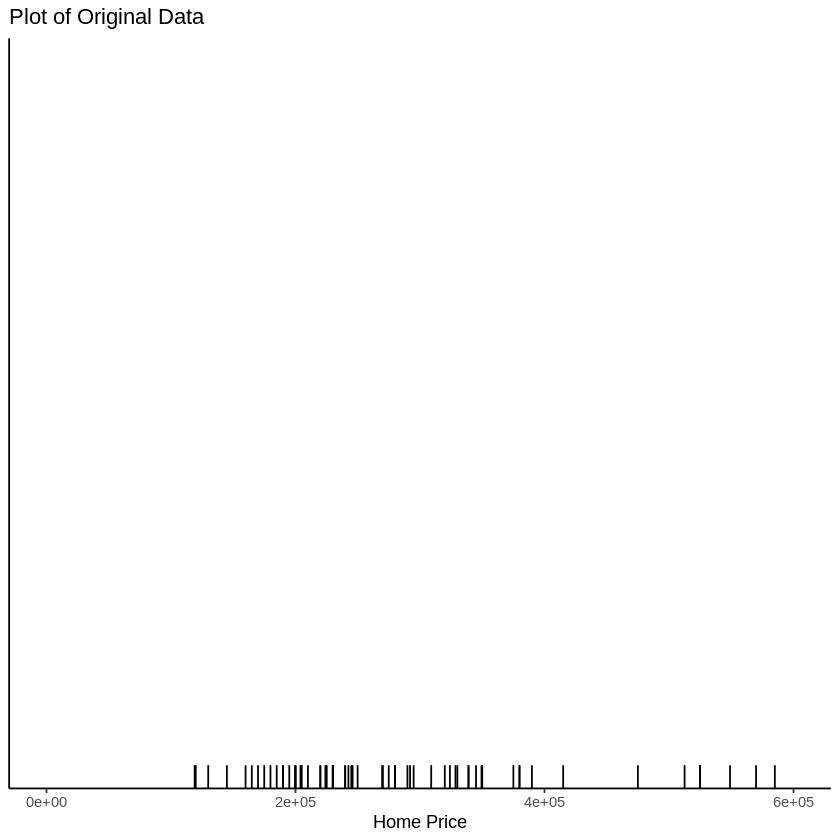

In [19]:
#@title Plot of the Original Data
# Rug Plot of Original Data
ggplot(data=LaCrosseWinonaHomePrices, aes(x=PRICE)) + 
  geom_rug() + 
  xlim(0,600000) +
  ggtitle("Plot of Original Data") + 
  xlab("Home Price")+
  theme_classic()

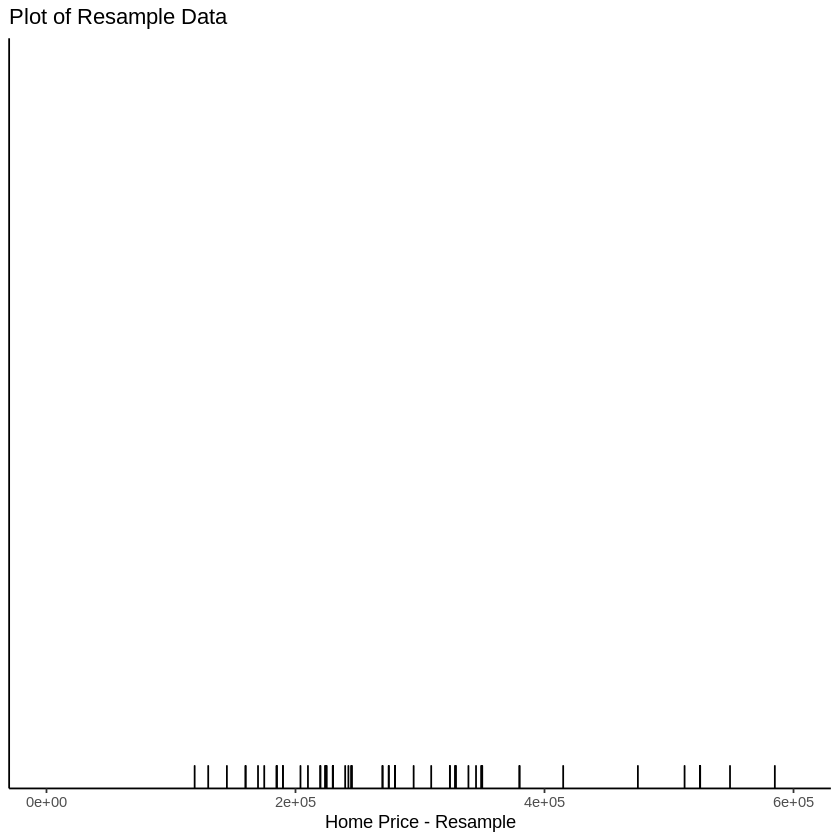

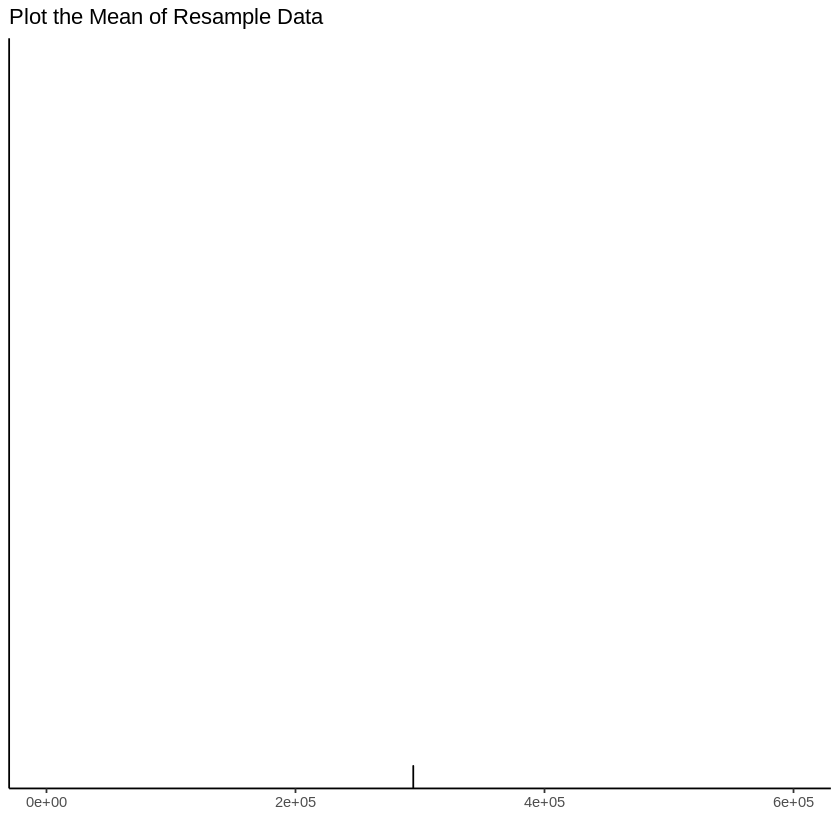

In [23]:
#@title Plot of 1 Resample
#Get a single resample and put the outcomes into a data.frame
Resample = sample(LaCrosseWinonaHomePrices$PRICE,size=length(LaCrosseWinonaHomePrices$PRICE),replace=TRUE)
HomePrice_Resample <- data.frame(Resample)

#Create a plot of the single resample
ggplot(data=HomePrice_Resample, aes(x=Resample)) + 
  geom_rug() + 
  xlim(0,600000) +
  ggtitle("Plot of Resample Data") + 
  xlab("Home Price - Resample") + 
  theme_classic()

#Create a plot of the single resample
ggplot(data=(HomePrice_Resample %>% summarize(MeanResample = mean(Resample))), aes(x=MeanResample)) + 
  geom_rug() + 
  xlim(0,600000) +
  ggtitle("Plot the Mean of Resample Data") + 
  xlab("") + 
  theme_classic()


In [29]:
BootMean=function(y, b=100, plotit = FALSE){
   output.vec=rep(0,b)
   for(i in 1:b){
      ystar=sample(y,size=length(y),replace=TRUE)
      output.vec[i]=mean(ystar)
   }
   Outcomes_DF <- data.frame(Outcomes = output.vec)

   if(plotit == TRUE){
     myplot <- ggplot(data=Outcomes_DF, aes(x=Outcomes)) + 
               geom_rug() + 
               xlab("Outcomes") +
               theme_classic()
    print(myplot)
   }
   return(Outcomes_DF)
}


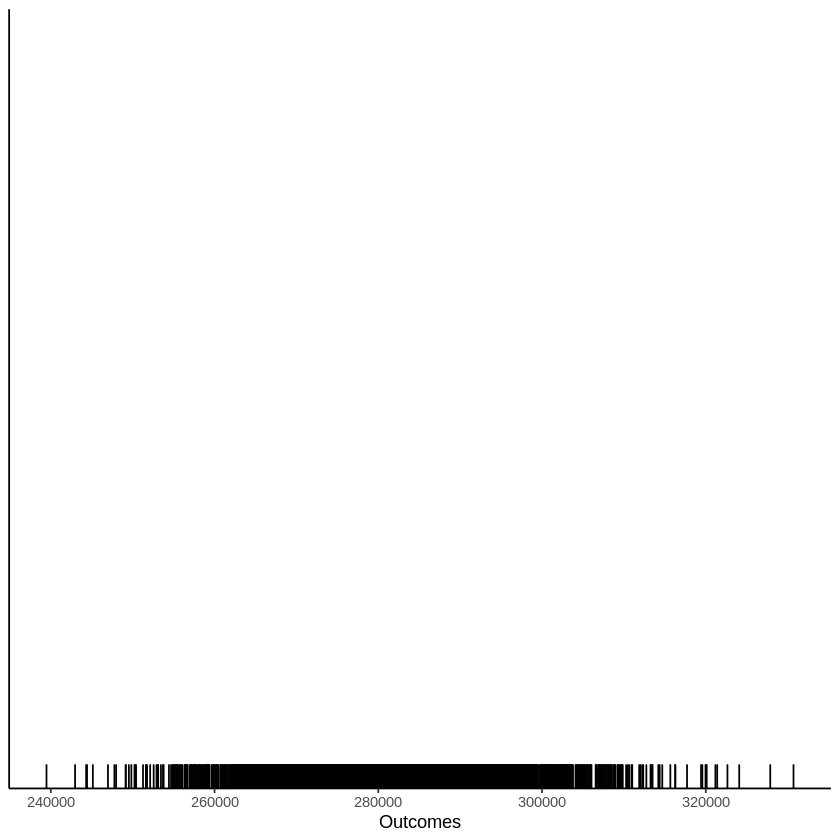

In [42]:
Mean_RepeatedSampling <- BootMean(LaCrosseWinonaHomePrices$PRICE, b=2000, plotit=TRUE)

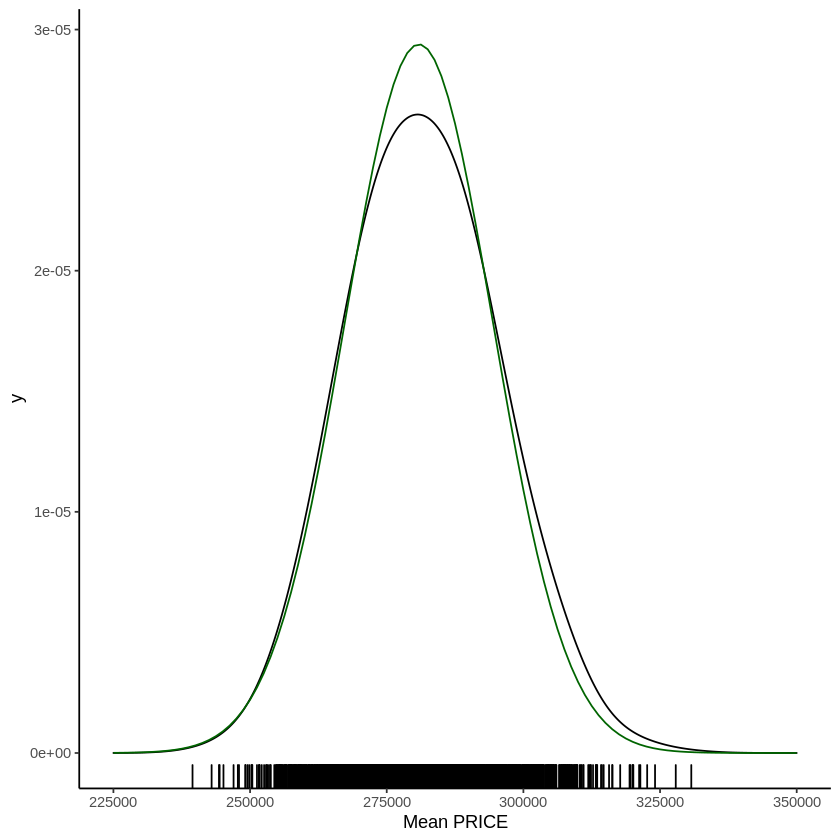

In [43]:
ggplot(data=Mean_RepeatedSampling, aes(x=Outcomes)) + 
  geom_rug() + 
  geom_density(adjust=2) +
  stat_function(fun = dnorm, args = list(mean = mean(LaCrosseWinonaHomePrices$PRICE), sd = (sd(LaCrosseWinonaHomePrices$PRICE)/sqrt(length(LaCrosseWinonaHomePrices$PRICE)))), color="darkgreen") + 
  #xlim(0,600000) +
  xlim(225000,350000) +
  xlab("Mean PRICE") + 
  theme_classic()

In [55]:
(Mean_RepeatedSampling
  %>% summarize(
                 StdError_via_Simulation = sd(Outcomes)
  )
)

StdError_via_Simulation
<dbl>
13520.21


In [54]:
(LaCrosseWinonaHomePrices
  %>% summarize(
              '2.5 %' = mean(PRICE) - qt(0.975,df=n()-1) * (sd(PRICE)/sqrt(n())),
              '97.5 %' = mean(PRICE) + qt(0.975,df=n()-1) * (sd(PRICE)/sqrt(n())),
            )
  %>% mutate(Type = "Theory")
  %>% relocate(Type)
) -> Theory_CI

(Mean_RepeatedSampling
  %>% summarize(
              '2.5 %' = mean(Outcomes) - 2 * sd(Outcomes),
              '97.5 %' = mean(Outcomes) + 2 * sd(Outcomes),
            )
  %>% mutate(Type = "Simulation")
  %>% relocate(Type)
) -> Simulation_CI

bind_rows(Theory_CI,Simulation_CI)

Type,2.5 %,97.5 %
<chr>,<dbl>,<dbl>
Theory,253782.0,307988.2
Simulation,254559.1,308640.0




---



---



A statistical modeling approach has several advantages compared to other approaches to modeling this type of data. This data represents a pseudo random sample of home prices.  Thus, it is certainly true that a different sample of homes will produce a slightly different regression line.  This begs the question to what degree will my regression line change from sample-to-sample.  In particular, to what degree will my y-intercept and slope change over repeated sampling.  

<table border="0" align="center">
<tr>
  <td width="50%" align="center" valign="center" bgcolor="white"><font size="+2">Population Side</font><br>True Relationship - All Homes<br><img src="https://drive.google.com/uc?export=view&id=1zS3DBjQGDWhDmF9L2p6gAY-smrRIHa_V"></img>
  </td>
  <td width="50%" align="center" valign="center" bgcolor="white"><font size="+2">Sample Side</font><br>An Estimate of the True Relationship<br><img src="https://drive.google.com/uc?export=view&id=10xsQT7WQTurnrkUdBlpeV5tfhStlNh8m"></img>
  </td>
</table>

<table border="0" align="center">
<tr>
  <td align="center" valign="center" bgcolor="white"><font size="+2">Outcomes Vary Over Repeated Samples</font><br><img src="https://drive.google.com/uc?export=view&id=1V-d4CdoSZUKB7UIAKF6Vliw4IqS1BZ2f" width="50%" height="50%"></img>
  </td>
</table>

## Slope over Repeated Sampling

In [ ]:
LModel_Price_Sqft <- lm(PRICE ~ SQUAREFEET, data=LaCrosseWinonaHomePrices)

In [ ]:
summary(LModel_Price_Sqft)


Call:
lm(formula = PRICE ~ SQUAREFEET, data = LaCrosseWinonaHomePrices)

Residuals:
    Min      1Q  Median      3Q     Max 
-133303  -46568   -6090   36819  158794 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 76499.678  20259.923   3.776 0.000348 ***
SQUAREFEET     98.808      8.981  11.002  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 66180 on 65 degrees of freedom
Multiple R-squared:  0.6506,	Adjusted R-squared:  0.6453 
F-statistic:   121 on 1 and 65 DF,  p-value: < 2.2e-16


In [ ]:
#######################################################
# Bootstrap Regression
# Note: bootstrapping residuals here
#######################################################

BootReg=function(slr_object,b=100,delay=0){

	y=slr_object$model[,1]
	x=slr_object$model[,2]
	resid=slr_object$residuals

	output.mat=matrix(0,b,4)
	
	plot(x,y,type="n",xlab="SquareFeet",ylab="CurrentPrice")
	#points(x,y)
	abline(slr_object)
	Sys.sleep(2+delay)
	points(x,y,col="white")


	for(i in 1:b){

		residstar = sample(resid,replace=F)
		ystar=y+residstar
		lmtemp = lm(ystar~x)
		#points(x,ystar)
		abline(lmtemp,col="grey")
		xjitter1=min(x)+0.67*(max(x)-min(x))+runif(1,-0.2*(max(x)-min(x)),0.2*(max(x)-min(x)))
		xjitter2=xjitter1 + 0.1*(max(x)-min(x))
		segments(xjitter1,+lmtemp$coefficients[[1]]+xjitter1*lmtemp$coefficients[[2]],xjitter2,lmtemp$coefficients[[1]]+xjitter1*lmtemp$coefficients[[2]])
		segments(xjitter2,lmtemp$coefficients[[1]]+xjitter1*lmtemp$coefficients[[2]],xjitter2,lmtemp$coefficients[[1]]+xjitter2*lmtemp$coefficients[[2]])
		text(xjitter2+0.02*(max(x)-min(x)),lmtemp$coefficients[[1]]+xjitter1*lmtemp$coefficients[[2]],round(lmtemp$coefficients[[2]],2),cex=0.75)
		Sys.sleep(delay)
		points(x,ystar,col="white")
		
		output.mat[i,1]=lmtemp$coefficients[[1]]
		output.mat[i,2]=lmtemp$coefficients[[2]]
		
	}
	
	Intercept = output.mat[,1]
	Slope = output.mat[,2]
	return(data.frame(Intercept, Slope))
}


Using the BootReg() function to get the slopes over repeated sampling

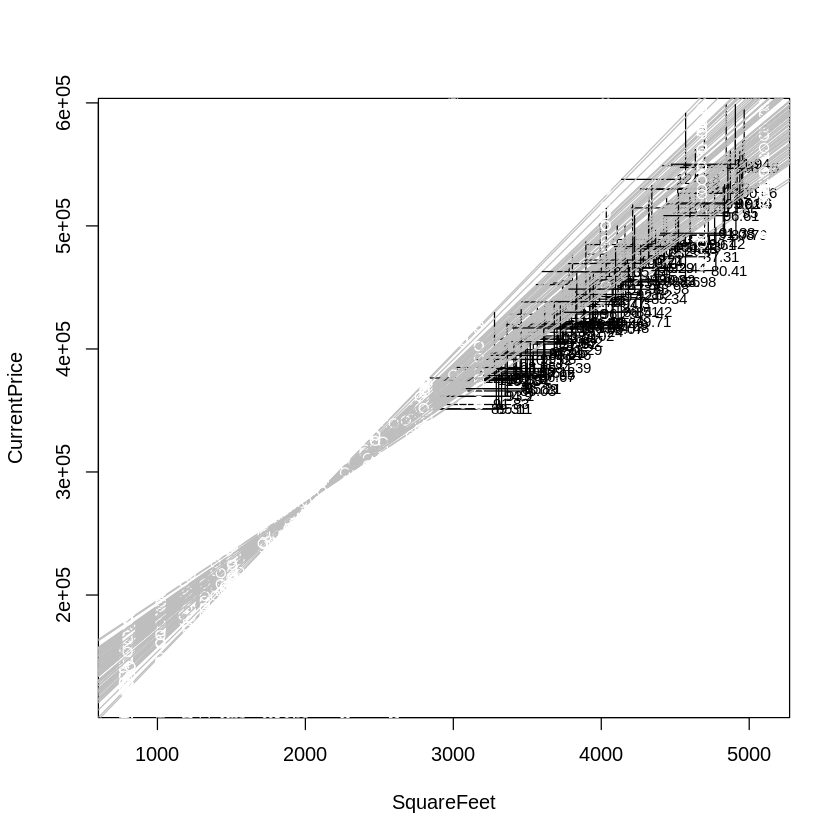

In [ ]:
LModel_RepeatedSampling <- BootReg(LModel_Price_Sqft, b=100)

In [ ]:
(LModel_RepeatedSampling
  %>% summarize(
                 StdError_Intercept = sd(Intercept),
                 StdError_Slope = sd(Slope)
  )
)

StdError_Intercept,StdError_Slope
<dbl>,<dbl>
19637.23,9.493428


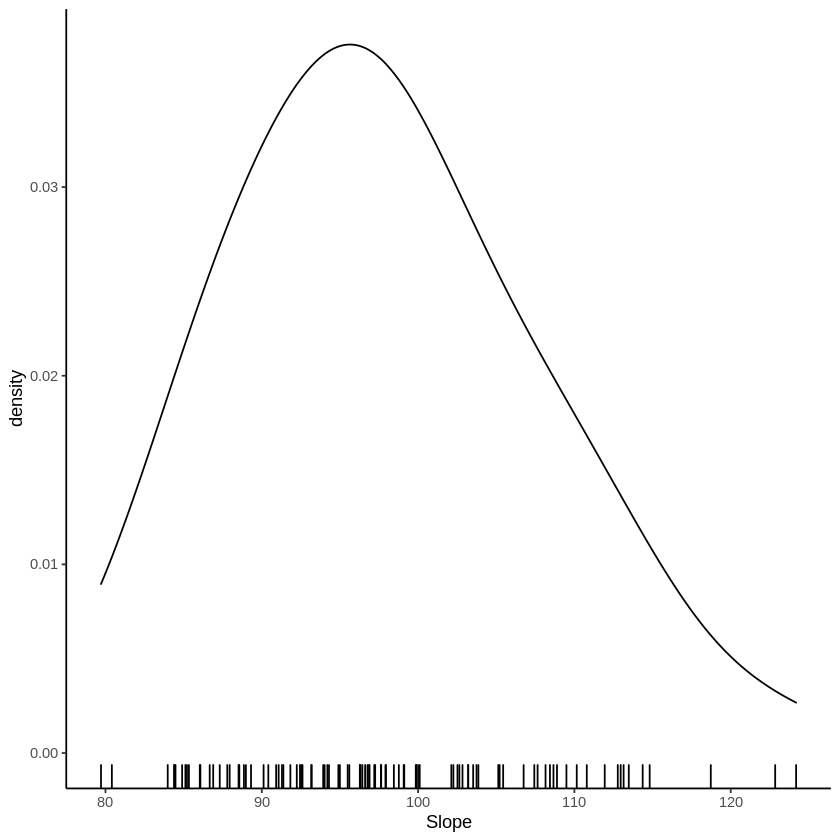

In [ ]:
#plot the bootstrap distribution
# Empirical Density Function
ggplot(data=LModel_RepeatedSampling, aes(x=Slope)) + 
  geom_rug() + 
  #geom_histogram(aes(y=..density..),bins=8) + 
  geom_density(adjust=1.5) +
  theme_classic()

In [ ]:

( LModel_RepeatedSampling
  %>% summarise(enframe(quantile(Intercept, c(0.025, 0.975)), "Quantiles", "Intercept"))
  %>% spread(Quantiles,Intercept)
  %>% mutate(Estimate = "Intercept")
  %>% relocate(Estimate)
) -> Intercept_CI

( LModel_RepeatedSampling
  %>% summarise(enframe(quantile(Slope, c(0.025, 0.975)), "Quantiles", "Slope"))
  %>% spread(Quantiles,Slope)
  %>% mutate(Estimate = "Slope")
  %>% relocate(Estimate)
) -> Slope_CI

bind_rows(Intercept_CI,Slope_CI)

Estimate,2.5%,97.5%
<chr>,<dbl>,<dbl>
Intercept,39141.27757,106767.0272
Slope,84.17569,116.8687


## Getting the Theory Based Interval

The 95% confidence interval for the model parameters can be computed using the confint() function.

In [ ]:
confint(LModel_Price_Sqft)

,2.5 %,97.5 %
(Intercept),36037.81715,116961.5395
SQUAREFEET,80.87241,116.7439


End of Document